#Data Preparation

In [ ]:
import pandas as pd

df= pd.read_csv('/content/voice.csv')
df.drop(['modindx','dfrange','maxdom','mindom','meandom','maxfun'],axis=1, inplace=True)


#Binarizer
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['label']:
    df[col]=lb.fit_transform(df[col])
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,1


1 == Male
0 == Female

#Separation of Labels & Data

In [ ]:
#Setting Features and Labels
x_cols = [x for x in df.columns if x != 'label']
X_data = df[x_cols]
y_data = df['label']



#Splitting Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=4)

#K = 3 Test Predictions

In [ ]:
#KNN Predict
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred[0:5] #First five data

array([1, 1, 1, 1, 0])

#KNN Evaluation

In [ ]:
knn.score(X_test,y_test)

0.831230283911672

#Finding Best number of Neighbors

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


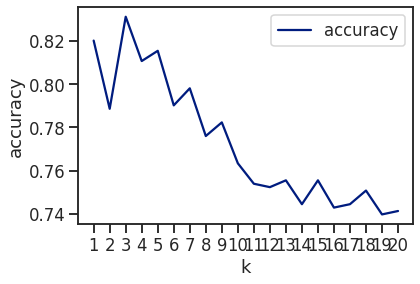

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

score_list = list()

for k in range(1, 21):
    knn =  KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_data)
    score = knn.score(X_test, y_test)
    score_list.append((k,score))
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = score_df.set_index('k').plot()
ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));

Result: KNN performs best at K=3

#Saving Model

In [ ]:
#Save Model
from sklearn.externals import joblib
joblib.dump(knn, 'VoiceRecognitionKNN.pkl')

['VoiceRecognitionKNN.pkl']

#Loading Model

In [ ]:
#Load Model
LoadModel = joblib.load('/content/VoiceRecognitionKNN.pkl' , mmap_mode ='r')
LoadModel.score(X_test,y_test)
#modelPred=LoadModel.predict(X_data)


0.831230283911672

#Testing Saved Model

Yung data dito pre kinuha ko lang sa orig na dataframe. bandang dulo. ayon female naman

In [ ]:
import numpy as np
test_data = np.array([0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770])
newdf = pd.DataFrame([test_data], columns=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
      'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun'])

LoadModel.predict(newdf)

array([0])

#SVM

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', gamma=1.0, C=10.0)
svc_model.fit(X_train,y_train)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = svc_model.predict(X_test)
predictions[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
#Save Model
from sklearn.externals import joblib
joblib.dump(svc_model, 'VoiceRecognitionSVM.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['VoiceRecognitionSVM.pkl']

In [ ]:
#Load Model
LoadModelSVM = joblib.load('/content/VoiceRecognitionSVM.pkl' , mmap_mode ='r')
LoadModelSVM.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions,y_test))

0.919558359621451


In [ ]:
import numpy as np
test_data = np.array([0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656])
newdf = pd.DataFrame([test_data], columns=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
      'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun'])

prediction=LoadModelSVM.predict(newdf)[0]

if prediction == 1:
  print('Male')
if prediction == 0:
  print('Female')

Male


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,1
